# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key


In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace("city", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nazca
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | phulji
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | jaynagar-majilpur
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | stavyshche
Processing Record 15 of Set 1 | malyye derbety
Processing Record 16 of Set 1 | mosquera
Processing Record 17 of Set 1 | dingle
Processing Record 18 of Set 1 | waitara
Processing Record 19 of Set 1 | tazmalt
Processing Record 20 of Set 1 | moerai
Processing Record 21 of Set 1 | cabedelo
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | kawal

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nazca,-14.8333,-74.9500,29.36,29,100,5.07,PE,1670352331
1,castro,-24.7911,-50.0119,23.61,81,41,2.88,BR,1670352331
2,chuy,-33.6971,-53.4616,26.46,48,0,4.89,UY,1670352331
3,ahipara,-35.1667,173.1667,15.82,92,100,6.79,NZ,1670352332
4,phulji,26.8825,67.6807,19.87,28,3,1.43,PK,1670352332


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nazca,-14.8333,-74.9500,29.36,29,100,5.07,PE,1670352331
1,castro,-24.7911,-50.0119,23.61,81,41,2.88,BR,1670352331
2,chuy,-33.6971,-53.4616,26.46,48,0,4.89,UY,1670352331
3,ahipara,-35.1667,173.1667,15.82,92,100,6.79,NZ,1670352332
4,phulji,26.8825,67.6807,19.87,28,3,1.43,PK,1670352332


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

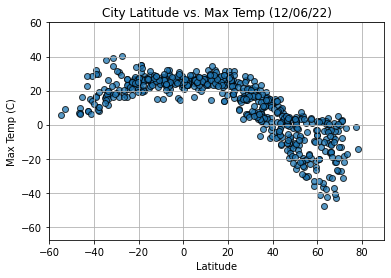

In [16]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties


plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],alpha=0.75,edgecolors='black')
plt.title(f"City Latitude vs. {'Max Temp'} ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Max Temp (C)')
plt.xlim(-60,90)
plt.ylim(min(city_data_df['Max Temp'])-20,max(city_data_df['Max Temp'])+20)
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

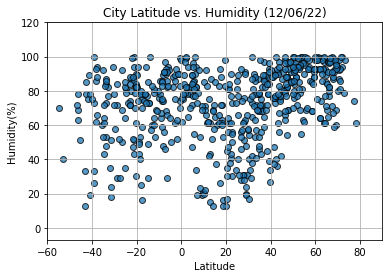

In [15]:
# Build the scatter plots for latitude vs. humidity


# Incorporate the other graph properties
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],alpha=0.75,edgecolors='black')
plt.title(f"City Latitude vs. {'Humidity'} ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Humidity(%)')
plt.xlim(-60,90)
plt.ylim(min(city_data_df['Humidity'])-20,max(city_data_df['Humidity'])+20)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

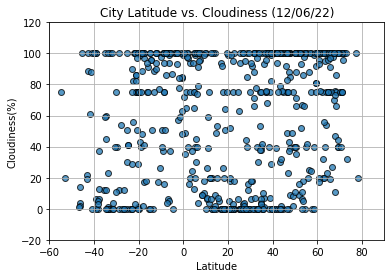

In [18]:
# Build the scatter plots for latitude vs. cloudiness


# Incorporate the other graph properties

plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],alpha=0.75,edgecolors='black')
plt.title(f"City Latitude vs. {'Cloudiness'} ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness(%)')
plt.xlim(-60,90)
plt.ylim(min(city_data_df['Cloudiness'])-20,max(city_data_df['Cloudiness'])+20)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

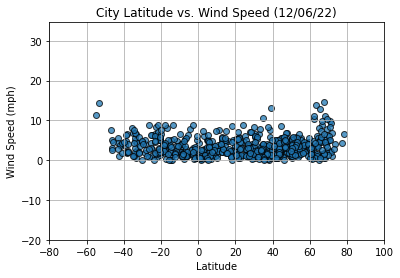

In [19]:
# Build the scatter plots for latitude vs. wind speed


# Incorporate the other graph properties
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],alpha=0.75,edgecolors='black')
plt.title(f"City Latitude vs. {'Wind Speed'} ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed (mph)')
plt.xlim(-80,100)
plt.ylim(min(city_data_df['Wind Speed'])-20,max(city_data_df['Wind Speed'])+20)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,phulji,26.8825,67.6807,19.87,28,3,1.43,PK,1670352332
7,jaynagar-majilpur,22.1758,88.4178,18.30,41,95,3.26,IN,1670352333
8,tasiilaq,65.6145,-37.6368,-2.91,65,19,4.59,GL,1670352334
11,tuktoyaktuk,69.4541,-133.0374,-27.00,69,40,7.72,CA,1670352336
13,stavyshche,50.4000,29.5333,-6.16,84,35,5.55,UA,1670352337


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nazca,-14.8333,-74.9500,29.36,29,100,5.07,PE,1670352331
1,castro,-24.7911,-50.0119,23.61,81,41,2.88,BR,1670352331
2,chuy,-33.6971,-53.4616,26.46,48,0,4.89,UY,1670352331
3,ahipara,-35.1667,173.1667,15.82,92,100,6.79,NZ,1670352332
5,bredasdorp,-34.5322,20.0403,16.74,64,45,1.35,ZA,1670352332


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.74x + 33.88
The r-value is: -0.833080390844331


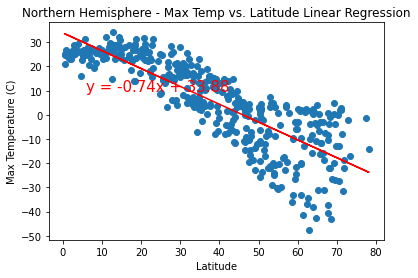

In [24]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5004861856443985


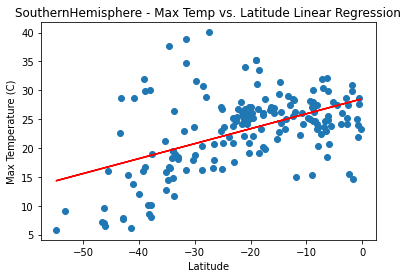

In [26]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('SouthernHemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The relationship that latitude and Max temp have is that the closer the latitude gets to the Equator(0) the higher the temperature gets and we see this within the two scatter plot graphs for both Hemispheres in the world.

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.42x + 58.22
The r-value is: 0.39684517409046943


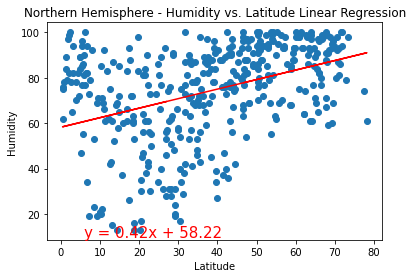

In [28]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.22189597993729224


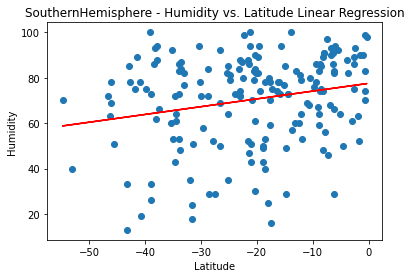

In [29]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('SouthernHemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is no linear relationship regarding humidity and latitude within these graphs as there is about a relatively even spread of cities within this scatter plot.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.52x + 37.66
The r-value is: 0.26022987831306665


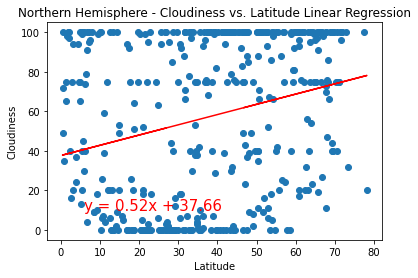

In [30]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.38900307450296995


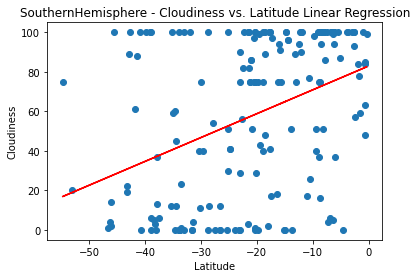

In [31]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('SouthernHemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The cloudiness tends to be very minimal or a lot with cities but no notable relationship exists within these two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.21035893649768903


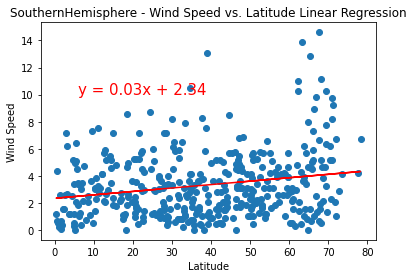

In [32]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('SouthernHemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.2828491094917931


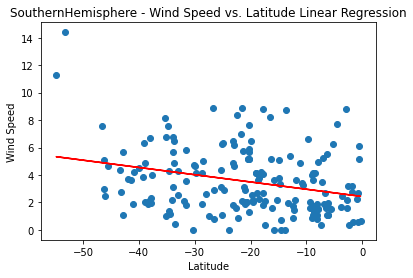

In [34]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('SouthernHemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The regression does not display a correlation between Wind speed and Latitude.